# Lecture #5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The DataFrame Data Structure

### Initializing DataFrame

In [2]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3])
df

,Cost,Item Purchased,Name
0,22.5,Dog Food,Chris
1,2.5,Kitty Litter,Kevyn
2,5.0,Bird Seed,Vinod


In [3]:
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


## Indexing DataFrame

### Indexing with column names or `loc()`

In [4]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [5]:
df[['Cost', 'Name']]

,Cost,Name
Store 1,22.5,Chris
Store 1,2.5,Kevyn
Store 2,5.0,Vinod


In [6]:
df.loc['Store 2']

Cost                      5
Item Purchased    Bird Seed
Name                  Vinod
Name: Store 2, dtype: object

In [7]:
type(df.loc['Store 2'])

pandas.core.series.Series

In [8]:
df.loc['Store 1']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [9]:
type(df.loc['Store 1'])

pandas.core.frame.DataFrame

In [10]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [11]:
df.T

,Store 1,Store 1,Store 2
Cost,22.5,2.5,5
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Name,Chris,Kevyn,Vinod


In [12]:
df.T.loc['Cost']

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

In [13]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [14]:
df.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [15]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [16]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


In [17]:
# IMPORTANT: when slicing with column names, the 'end' is INCLUDED!!!
df.loc[:, 'Cost':'Name']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


### Indexing with `iloc()`

In [18]:
df.iloc[1]

Cost                       2.5
Item Purchased    Kitty Litter
Name                     Kevyn
Name: Store 1, dtype: object

In [19]:
df.iloc[0:2]

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [20]:
df.iloc[:,0:1]

,Cost
Store 1,22.5
Store 1,2.5
Store 2,5.0


### Indexing with `ix()`: deprecated!!!

- `loc` works on labels in the index.
- `iloc` works on the positions in the index (so it only takes integers).
- `ix` usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

See [Deprecate .ix](http://pandas-docs.github.io/pandas-docs-travis/whatsnew.html#deprecate-ix) from pandas v0.20.0. I explain this just in case you encounter python codes with old pandas version.

In [21]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [22]:
df.ix?

In [23]:
df.ix['Store 1']

/Users/chomg/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [24]:
df.ix[1]

Cost                       2.5
Item Purchased    Kitty Litter
Name                     Kevyn
Name: Store 1, dtype: object

In [25]:
df.ix['Store 1':'Store 2']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [26]:
df.ix[1:3]

,Cost,Item Purchased,Name
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [27]:
df.ix['Store 1', 1:3]

,Item Purchased,Name
Store 1,Dog Food,Chris
Store 1,Kitty Litter,Kevyn


In [28]:
df.ix['Store 1', ['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5


### Drop selected rows or columns

In [29]:
df.drop('Store 1')

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [30]:
df.drop('Name', axis=1)

,Cost,Item Purchased
Store 1,22.5,Dog Food
Store 1,2.5,Kitty Litter
Store 2,5.0,Bird Seed


In [31]:
df.drop(['Name', 'Cost'], axis=1)

,Item Purchased
Store 1,Dog Food
Store 1,Kitty Litter
Store 2,Bird Seed


In [32]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [33]:
copy_df = df.copy()
copy_df = copy_df.drop('Store 1')
copy_df

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [34]:
copy_df.drop?

In [35]:
copy_df

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [36]:
del copy_df['Name']
copy_df

,Cost,Item Purchased
Store 2,5.0,Bird Seed


### `unique()`

In [37]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [38]:
df.index.unique()

Index(['Store 1', 'Store 2'], dtype='object')

## Merging Dataframes


In [39]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


### Adding new column

In [40]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [41]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [42]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [43]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [44]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [45]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [46]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [47]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [48]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [49]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [50]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [51]:
# See options of `merge()`
pd.merge?

In [52]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [53]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [54]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


## Simple aggregation

See [Computations / Descriptive Stats](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats).

In [55]:
rnd_df = pd.DataFrame({'A': np.random.randint(0, 100, 5), 'B': np.random.randint(0, 100, 5)})
rnd_df

,A,B
0,45,27
1,59,61
2,4,27
3,28,31
4,24,12


In [56]:
rnd_df.mean()

A    32.0
B    31.6
dtype: float64

In [57]:
rnd_df.max()

A    59
B    61
dtype: int64

In [58]:
rnd_df.max(axis='columns') # or axis=1

0    45
1    61
2    27
3    31
4    24
dtype: int64

In [59]:
rnd_df.describe()

,A,B
count,5.000000,5.000000
mean,32.000000,31.600000
std,20.988092,17.966636
min,4.000000,12.000000
25%,24.000000,27.000000
50%,28.000000,27.000000
75%,45.000000,31.000000
max,59.000000,61.000000


### Simple plotting

See [Plotting](https://pandas.pydata.org/pandas-docs/stable/api.html#plotting).

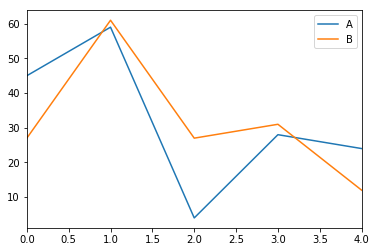

In [60]:
rnd_df.plot()

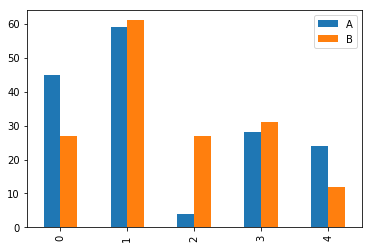

In [61]:
rnd_df.plot.bar();

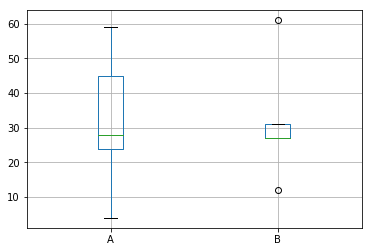

In [62]:
rnd_df.boxplot();

## Reading data from a file and writing to a file

In [63]:
filename = 'titanic_train.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
with open(filename, 'r') as f:
    for i in range(5):
        print(f.readline())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S

2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C

3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S

4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S



In [65]:
pd.read_csv?

In [66]:
df = df.iloc[:5,:7]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0


In [67]:
new_filename = 'titanic_modified.csv'
df.to_csv(new_filename, index=False)
with open(new_filename, 'r') as f:
    print(f.read())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0



In [68]:
df.to_csv?

## Useful functions

### `where()`

In [69]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic_df[titanic_df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The following style function invocations are callsed method cascading or method chaining. See [Method cascading](https://en.wikipedia.org/wiki/Method_cascading).

In [71]:
df.dropna?

In [72]:
titanic_df.where(titanic_df['Survived'] == 1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
titanic_df.where(titanic_df['Survived'] == 1).dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S


In [74]:
(titanic_df.where(titanic_df['Survived'] == 1)
           .dropna()
           .head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S


### `sort_values()`, `reindex()`

In [75]:
titanic_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [76]:
titanic_df['Fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [77]:
titanic_df['Fare'].sort_values(ascending=False).index

Int64Index([679, 258, 737, 341, 438,  88,  27, 311, 742, 299,
            ...
            732, 466, 263, 674, 413, 277, 633, 302, 597, 271],
           dtype='int64', length=891)

In [78]:
# what would happen if we omit 'index' at the end of expression?
titanic_df.iloc[titanic_df['Fare'].sort_values(ascending=False).index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


In [79]:
titanic_df.reindex(titanic_df['Fare'].sort_values(ascending=False).index)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


### `nlargest()`

In [80]:
titanic_df.nlargest(5, 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [81]:
titanic_df.nlargest(5, ['Pclass', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [82]:
titanic_df.nlargest(5, 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [83]:
titanic_df.nlargest(5, ['Age', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [84]:
titanic_df.nlargest(1, ['Age', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [85]:
titanic_df.nlargest?

## Idiomatic Pandas: Making Code Pandorable

See [Description of 2010 Census data](https://www.census.gov/prod/cen2010/doc/sf1.pdf).

In [86]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [87]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [88]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

df.apply(min_max, axis=1).head()

,max,min
0,4858979,4785161
1,55347,54660
2,203709,183193
3,27341,26489
4,22861,22512


In [89]:
df.apply?

In [90]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,10887,10606
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,20944,20154
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,118437,115620
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,34153,33993


In [91]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

0       4858979
1         55347
2        203709
3         27341
4         22861
5         57776
6         10887
7         20944
8        118437
9         34153
10        26084
11        43943
12        13841
13        25767
14        13880
15        15072
16        51211
17        54514
18        13208
19        11758
20        38060
21        13963
22        82005
23        50358
24        43803
25        71387
26        81468
27        38309
28       104442
29        17231
         ...   
3163     133674
3164     396488
3165      52422
3166      24581
3167     169639
3168      74807
3169     586107
3170      37956
3171      12022
3172      49220
3173      15856
3174      14343
3175       7444
3176      41129
3177      13666
3178       4846
3179       8636
3180      97121
3181      18722
3182      82178
3183       2548
3184      29237
3185       8812
3186      30020
3187      10418
3188      45162
3189      23125
3190      21102
3191       8545
3192       7234
Length: 3193, dtype: int

## Group by: split, apply and combine

### Simple examples

This makes clear what the groupby accomplishes:

- The _split_ step involves breaking up and grouping a DataFrame depending on the value of the specified key.
- The _apply_ step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The _combine_ step merges the results of these operations into an output array.

In [92]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [93]:
df.groupby('key')

In [94]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### Realistic examples

In [95]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [96]:
df[df['STNAME'] == 'Alabama'].head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [97]:
df.where(df['STNAME'] == 'Alabama').head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50.0,3.0,6.0,1.0,1.0,Alabama,Autauga County,54571.0,54571.0,54660.0,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50.0,3.0,6.0,1.0,3.0,Alabama,Baldwin County,182265.0,182265.0,183193.0,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50.0,3.0,6.0,1.0,5.0,Alabama,Barbour County,27457.0,27457.0,27341.0,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50.0,3.0,6.0,1.0,7.0,Alabama,Bibb County,22915.0,22919.0,22861.0,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50.0,3.0,6.0,1.0,9.0,Alabama,Blount County,57322.0,57322.0,57373.0,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [98]:
df.where(df['STNAME'] == 'Alabama').dropna()['CENSUS2010POP'].head()

1     54571.0
2    182265.0
3     27457.0
4     22915.0
5     57322.0
Name: CENSUS2010POP, dtype: float64

In [99]:
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

In [100]:
for group, frame in df.groupby('STNAME'):
    print('Group name:', group)
    print(frame)
    break

Group name: Alabama
    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13   

In [101]:
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

### Performance comparison of naive iteration v.s. group by

In [102]:
%%timeit -n 10
# without print() to see the duration to execute this code
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])

601 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
%%timeit -n 10
# without print() to see the duration to execute this code
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])

12.1 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Using mapping functions with group by

In [104]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [105]:
df.groupby?

In [106]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1196 records in group 0 for processing.
There are 1154 records in group 1 for processing.
There are 843 records in group 2 for processing.


In [107]:
df.groupby(fun).groups

{0: Index(['Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama',
        ...
        'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana',
        'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana'],
       dtype='object', name='STNAME', length=1196),
 1: Index(['Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine',
        'Maine', 'Maine',
        ...
        'Pennsylvania', 'Pennsylvania', 'Pennsylvania', 'Pennsylvania',
        'Pennsylvania', 'Pennsylvania', 'Pennsylvania', 'Pennsylvania',
        'Pennsylvania', 'Pennsylvania'],
       dtype='object', name='STNAME', length=1154),
 2: Index(['Rhode Island', 'Rhode Island', 'Rhode Island', 'Rhode Island',
        'Rhode Island', 'Rhode Island', 'South Carolina', 'South Carolina',
        'South Carolina', 'South Carolina',
        ...
        'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming',
        'Wyoming', 'W

In [108]:
for group, frame in df.groupby(fun):
    print(group)
    print(frame)
    break

0
           SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME                                               
Alabama        40       3         6      1       0   
Alabama        50       3         6      1       1   
Alabama        50       3         6      1       3   
Alabama        50       3         6      1       5   
Alabama        50       3         6      1       7   
Alabama        50       3         6      1       9   
Alabama        50       3         6      1      11   
Alabama        50       3         6      1      13   
Alabama        50       3         6      1      15   
Alabama        50       3         6      1      17   
Alabama        50       3         6      1      19   
Alabama        50       3         6      1      21   
Alabama        50       3         6      1      23   
Alabama        50       3         6      1      25   
Alabama        50       3         6      1      27   
Alabama        50       3         6      1      29   
Alabama        50       3 

In [109]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [110]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [111]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [112]:
(df.set_index('STNAME')
   .groupby(level=0).groups)

{'Alabama': Index(['Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama'],
       dtype='object', name='STNAME'),
 'Alaska': Index(['Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska',
        'Alaska', 'Alaska', 

In [113]:
(df.set_index('STNAME')
   .groupby(level=0)['CENSUS2010POP'])

In [114]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

/Users/chomg/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [115]:
# a new and recommended way
(df.set_index('STNAME')
   .groupby(level=0)['CENSUS2010POP']
   .agg([np.average, np.sum])
   .rename(columns={'average': 'avr', 'sum': 'sum'})
)

,avr,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [116]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

/Users/chomg/.envs/py3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [117]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg([np.average, np.sum])
    .rename(columns={'average': 'avr', 'sum': 'sum'})
)

POPESTIMATE2010           POPESTIMATE2011          
                                 avr       sum             avr       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [118]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


Note: This notebook is a modified version of pandas examples on coursera and 'Python Data Science Handbook'.